# Mahalanobis

In [1]:
import numpy as np
from scipy.stats import multivariate_normal
from scipy.spatial.distance import mahalanobis
import matplotlib.pyplot as plt

In [2]:
mu1 = [.3, .5]
sx = .1
sy = .15
p=0.9
cov1 = [[sx**2, sx*sy*p], [sx*sy*p, sy**2]]
N1 = multivariate_normal(mean=mu1, cov=cov1)

mu2 = [.6, .6]
sx = .02
sy = .02
p=0.0
cov2 = [[sx**2, sx*sy*p], [sx*sy*p, sy**2]]
N2 = multivariate_normal(mean=mu2, cov=cov2)

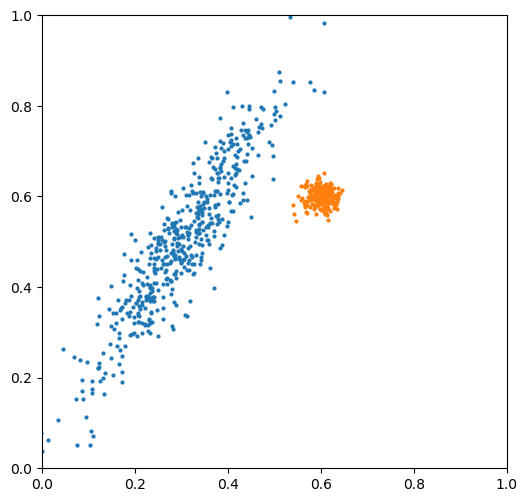

In [3]:
plt.figure(figsize=(6, 6), dpi=100)

x1, y1 = N1.rvs(size=500).T
plt.scatter(x1, y1, s=4, c='C0')
x2, y2 = N2.rvs(size=200).T
plt.scatter(x2, y2, s=4, c='C1')

plt.axis([0, 1, 0, 1])
plt.show()

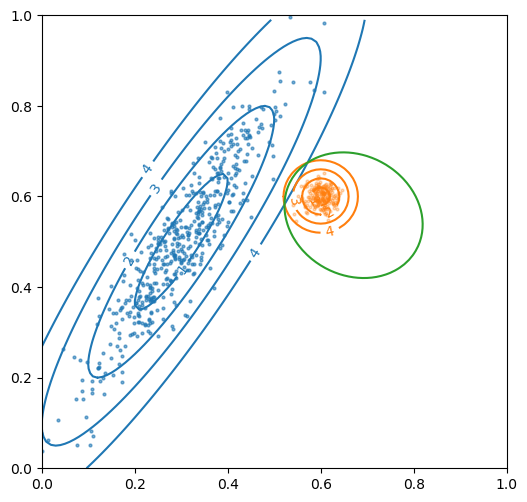

In [4]:
x, y = np.mgrid[0:1:.01, 0:1:.01]
lev = [1, 2, 3, 4]

plt.figure(figsize=(6, 6), dpi=100)

plt.scatter(x1, y1, s=4, c='C0', alpha=0.6)
plt.scatter(x2, y2, s=4, c='C1', alpha=0.3)

z1 = np.zeros(x.shape)
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        z1[i, j] = mahalanobis(mu1, [x[i, j], y[i, j]], np.linalg.inv(cov1))
cs = plt.contour(x, y, z1, levels=lev, colors='C0')
plt.clabel(cs, inline=1, fontsize=10, fmt='%i')

z2 = np.zeros(x.shape)
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        z2[i, j] = mahalanobis(mu2, [x[i, j], y[i, j]], np.linalg.inv(cov2))
cs = plt.contour(x, y, z2, levels=lev, colors='C1')
plt.clabel(cs, inline=1, fontsize=10, fmt='%i')

cs = plt.contour(x, y, z1-z2, levels=[0], colors='C2')

plt.axis([0, 1, 0, 1])
plt.show()